In [6]:
#importing libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Create a backup for the csv file. This is very important
from copy import deepcopy
df2 = deepcopy(df) #to create a copy that would contain original document
df2

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
...,...,...,...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune,2017,NaN,0
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN,2017,NaN,0
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN,2016,NaN,0
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN,2018,NaN,0


In [8]:
#upload csv dataset to be read and used
df = pd.read_csv("electronics.csv")

#call out the first 5 to confirm upload was successful
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [ ]:
#next is to understand the data

## EDA
#### Exploratory Data Analysis

In [8]:
df.shape

#format the number of rows and columns
print(f" We have {df.shape[0]} number of rows and {df.shape[1]} number of columns")

 We have 1292954 number of rows and 10 number of columns


In [12]:
# check to know where to start if it would be easy or had

#corresponding data types - use df.dtypes or df.info
#df.info() #df.dtypes would have been better
df.dtypes

item_id         int64
user_id         int64
rating        float64
timestamp      object
model_attr     object
category       object
brand          object
year            int64
user_attr      object
split           int64
dtype: object

In [15]:
#to get number of null values
#use isna or isnull then sum to get the number of null values in each column
df.isnull().sum()

item_id             0
user_id             0
rating              0
timestamp           0
model_attr          0
category            0
brand          961834
year                0
user_attr     1118830
split               0
dtype: int64

In [13]:
#to drop irrelevant columns
df.isnull().sum().drop(["year", "user_attr", "split"])

item_id            0
user_id            0
rating             0
timestamp          0
model_attr         0
category           0
brand         961834
dtype: int64

In [36]:
df.drop(["year", "user_attr", "split"], axis = 1, inplace = True) #axis is to emphasize columns and inplace to save it
df

,item_id,user_id,rating,timestamp,model_attr,category,brand
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN
...,...,...,...,...,...,...,...
1292949,9478,1157628,1.0,2018-09-26,Female,Headphones,Etre Jeune
1292950,9435,1157629,5.0,2018-09-26,Female,Computers & Accessories,NaN
1292951,9305,1157630,3.0,2018-09-26,Female,Computers & Accessories,NaN
1292952,9303,1157631,5.0,2018-09-29,Male,Headphones,NaN


In [37]:
#to see the columns we have left
df.columns

Index(['item_id', 'user_id', 'rating', 'timestamp', 'model_attr', 'category',
       'brand'],
      dtype='object')

In [38]:
#to get unique values in each column
df. nunique()

item_id          9560
user_id       1157633
rating              5
timestamp        6354
model_attr          3
category           10
brand              50
dtype: int64

In [39]:
#to see unique values in each column e.g model_attr
df['model_attr'].unique()

array(['Female', 'Female&Male', 'Male'], dtype=object)

In [40]:
df.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN


In [42]:
df['brand'].value_counts()[:5]

Bose        29222
Logitech    29203
Sony        20360
Mpow        17477
EldHus      16530
Name: brand, dtype: int64

In [12]:
#Data Type Conversion

df['timestamp'] = pd.to_datetime(df['timestamp']) #change and save in the exsisting variable for it to appear

In [46]:
df.dtypes

item_id                int64
user_id                int64
rating               float64
timestamp     datetime64[ns]
model_attr            object
category              object
brand                 object
dtype: object

In [ ]:
df['brand'] = df['brand'].astype('str') #this is just to convert to another data type. Thats.s what astype does
#if we run this, there would be no difference because 'brand' is already a string

In [49]:
#to get statistical information about the data

df.describe(include = 'all')#include = 'all' is to show for each and every column; without this, it would just do everything together.

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  This is separate from the ipykernel package so we can avoid doing imports until


,item_id,user_id,rating,timestamp,model_attr,category,brand
count,1.292954e+06,1.292954e+06,1.292954e+06,1292954,1292954,1292954,331120
unique,NaN,NaN,NaN,6354,3,10,50
top,NaN,NaN,NaN,2016-01-20 00:00:00,Female,Headphones,Bose
freq,NaN,NaN,NaN,1692,481171,359334,29222
first,NaN,NaN,NaN,1999-06-13 00:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-10-01 00:00:00,NaN,NaN,NaN
mean,4.183588e+03,5.605127e+05,4.051482e+00,NaN,NaN,NaN,NaN
std,2.525346e+03,3.342374e+05,1.379732e+00,NaN,NaN,NaN,NaN
min,0.000000e+00,0.000000e+00,1.000000e+00,NaN,NaN,NaN,NaN
25%,2.018000e+03,2.697482e+05,4.000000e+00,NaN,NaN,NaN,NaN


In [50]:
df.describe() #to see for everything that is statistical

,item_id,user_id,rating
count,1.292954e+06,1.292954e+06,1.292954e+06
mean,4.183588e+03,5.605127e+05,4.051482e+00
std,2.525346e+03,3.342374e+05,1.379732e+00
min,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.018000e+03,2.697482e+05,4.000000e+00
50%,3.930000e+03,5.518920e+05,5.000000e+00
75%,6.289000e+03,8.474858e+05,5.000000e+00
max,9.559000e+03,1.157632e+06,5.000000e+00


## Data Visualization

In [ ]:
# Univariate analysis and multivariate analysis
# Univariate: analysis with one variable(column) while multivariate with multiple variables
#scatterplot, boxplot, linespace are multivariate
#histogram, kde plot are univariate

In [53]:
# the distribution of ratings
df['rating'].value_counts() #to see the number of ratings

5.0    755755
4.0    214166
1.0    143755
3.0    100630
2.0     78648
Name: rating, dtype: int64

In [56]:
print(f"majority of the users gave 5 star ratings with {df['rating'].value_counts()[5]} value and the least rating was {df['rating'].value_counts()[2]}")

majority of the users gave 5 star ratings with 755755 value and the least rating was 78648


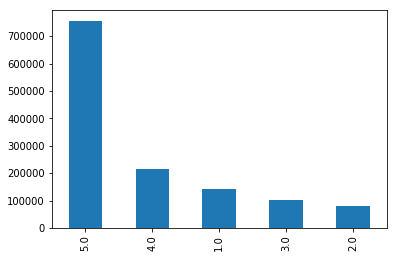

In [58]:
#or visualize it
df['rating'].value_counts().plot(kind = 'bar') #using matplottting already. kind specifies the kind of visualization to use.

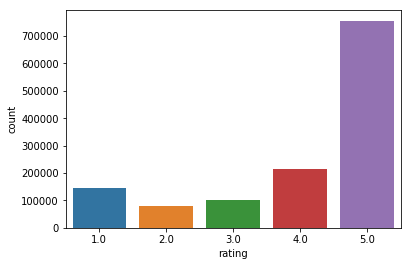

In [66]:
#another way to get the chart using seaborn
sns.countplot(data = df, x = 'rating') #countplot is exclusive for this because we are counting
plt.show()

In [69]:
#what was the best year of Sales?

df['year'] = df['timestamp'].dt.year #this is to create another column where we can extract the year from the timestamp

df.sample()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year
16983,392,16497,1.0,2008-03-26,Female,Computers & Accessories,Linksys,2008


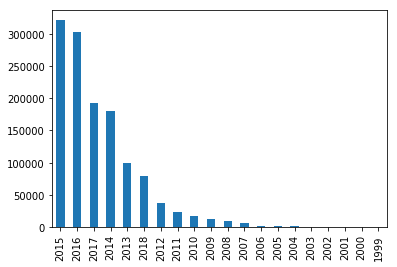

In [70]:
df['year'].value_counts().plot(kind = 'bar')
#first method to easily see while visualizing

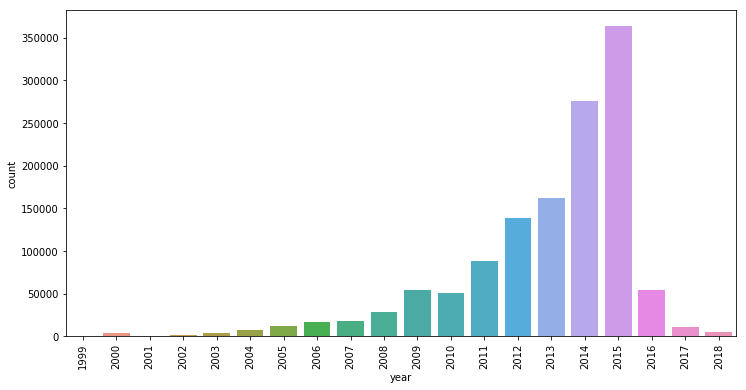

In [10]:
plt.figure(figsize = (12, 6))
sns.countplot(data = df, x = 'year')
#using seaborn method

plt.xticks(rotation = 'vertical') #time is to prevent it from being clumzy. it could also mean 90 degrees.

plt.show()

In [15]:
#what was the best month of Sales?

df['month'] = df['timestamp'].dt.month #this is to create another column where we can extract the month from the timestamp

df.sample()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
658294,1538,599083,5.0,2015-10-31,Female,Portable Audio & Video,NaN,2011,NaN,0,10


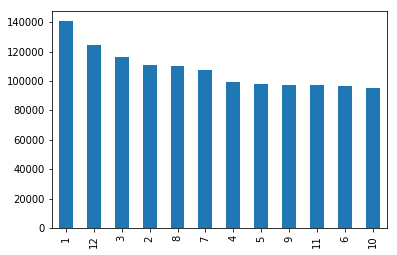

In [19]:
df['month'].value_counts().plot(kind = 'bar')

In [ ]:
df['category'].groupby() #try this personally

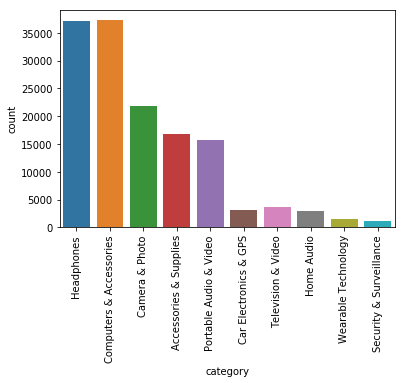

In [23]:
#what products by category were sold the most in January
plt.xticks(rotation = 90)
sns.countplot(data = df[df['month'] == 1], x = 'category', order = df['category'].value_counts().index)
plt.show()

In [33]:
df.shape

(1292954, 11)

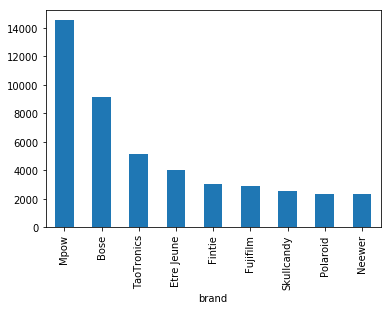

In [34]:
#what brand sold the most in 2015?
df[df['year'] == 2015].groupby(df['brand'])['rating'].count().sort_values(ascending = False)[:9].plot(kind = 'bar')

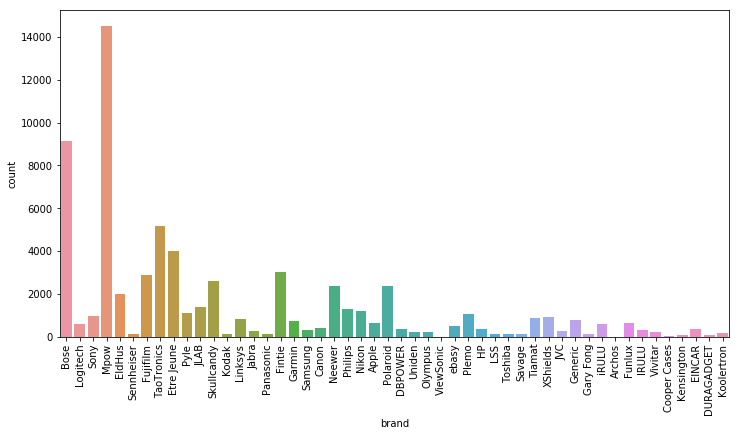

In [25]:
plt.figure(figsize = (12, 6))
plt.xticks(rotation = 90)
sns.countplot(data = df[df['year'] == 2015], x = 'brand', order = df['brand'].value_counts().index)
plt.show()

In [43]:
print(f"Brand Mpow sold the most in 2016 with a value of {df[df['year'] == 2015].groupby(df['brand'])['rating'].count().sort_values(ascending = True)[-1]}")

Brand Mpow sold the month with a value of 14525


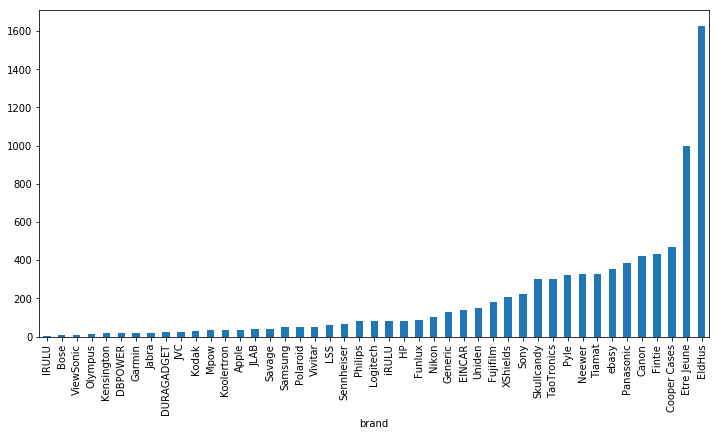

In [69]:
#what product sold the most in 2016?
plt.figure(figsize = (12, 6))
df[df['year']== 2016].groupby(df['brand'])['rating'].count().sort_values(ascending = True).plot(kind = 'bar')

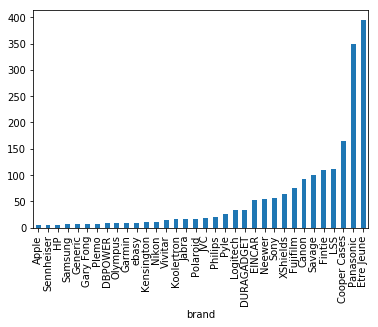

In [52]:
#what brand sold the most in 2017?



df[df['year']== 2017].groupby(df['brand'])['rating'].count().sort_values(ascending = True).plot(kind = 'bar')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

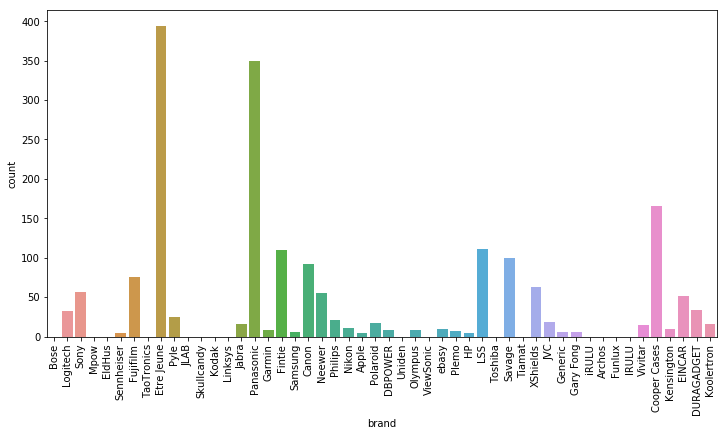

In [67]:
plt.figure(figsize =(12,6))
sns.countplot(data = df[df['year'] == 2017], x = 'brand', order = df['brand'].sort_values(ascending = True).value_counts().index)
plt.xticks(rotation = 90)

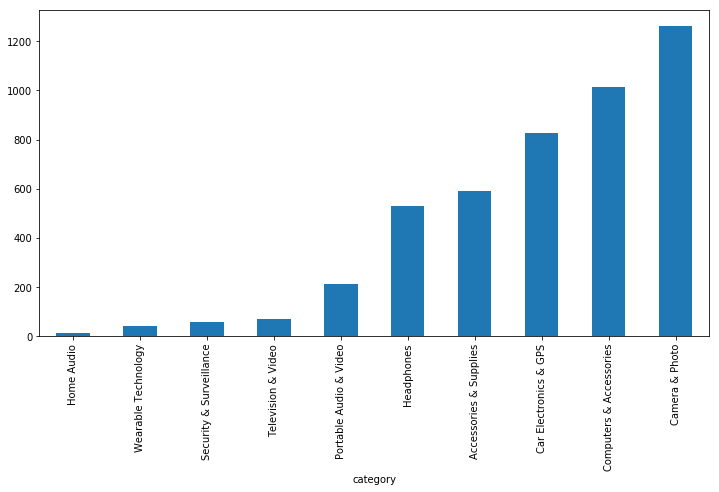

In [70]:
##what category sold the most in 2018?
plt.figure(figsize= (12, 6))
df[df['year'] == 2018].groupby(['category'])['rating'].count().sort_values(ascending = True).plot(kind = 'bar')
plt.show()

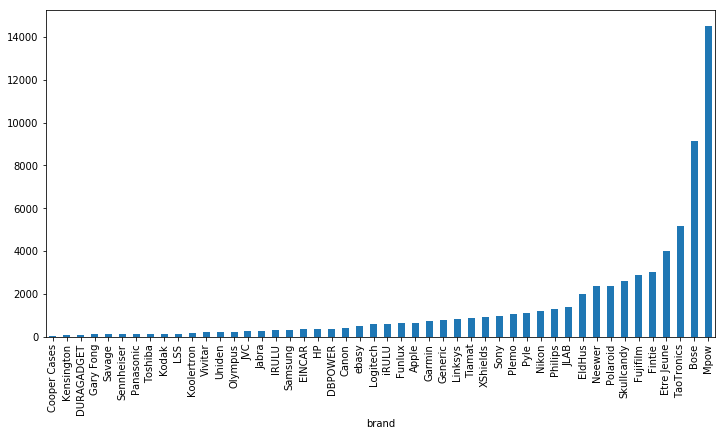

In [66]:
#How much was sales made in the year 2015?
plt.figure(figsize= (12, 6))
df[df['year'] == 2015].groupby(['brand'])['rating'].count().sort_values(ascending = True).plot(kind = 'bar')
plt.show()